### - Bibliotekos

In [1]:
import os
import soundfile as sf
import numpy as np
import matplotlib.pyplot as plt
import sounddevice as sd

### - Failo pasirinkimo dalis

In [2]:
folder = "ivairus"
files = [f for f in os.listdir(folder) if f.endswith(".wav")]

if not files:
    print(f"Kataloge \"{folder}\" nėra \".wav\" formato failų.")
    exit()

print("Pasirinkite failą iš pateiktų įvesdami skaičių:")
for i, f in enumerate(files, start=1):
    print(f"{i}. {f}")

while True:
    choice = int(input(f"Jūsų pasirinkimas (1–{len(files)}): "))
    if 1 <= choice <= len(files):
        file_path = os.path.join(folder, files[choice-1])
        print("Pasirinktas failas:", file_path)
        break
    else:
        print("Nėra tokio pasirinkimo.")


Pasirinkite failą iš pateiktų įvesdami skaičių:
1. about_time_MALE.wav
2. Angry_german.wav
3. Angry_german_2.wav
4. Angry_German_Tranformed_F.wav
5. applause.wav
6. bad_boy2_FEMALE.wav
7. Brown_noise.wav
8. cat_flat_MALE.wav
9. cat_got_tongue_FEMALE.wav
10. CAT_TONGUE_CONVERTED_MALE.wav
11. Cat_tongue_Male.wav
12. city_traffic.wav
13. DTMF_tones.wav
14. du_drambliai.wav
15. Elephant.wav
16. Englishman.wav
17. Englishman_100ms.wav
18. Englishman_16ms.wav
19. Englishman_20ms.wav
20. Englishman_2ms.wav
21. Englishman_4ms.wav
22. Englishman_8ms.wav
23. Female_scream.wav
24. modified_cat_got_tongue_FEMALE.wav
25. muffled-drum-kick.wav
26. Multitone.wav
27. Neutral_lithuanian.wav
28. oceanwave.wav
29. Opera-vocal_129bpm_F_minor.wav
30. Sinus_125Hz.wav
31. Sinus_500Hz.wav
32. Stereo_music.wav
33. Thrash_metal.wav
34. White_noise.wav
35. woman-ohhahhh.wav
36. woman_oaah_transformed.wav


Jūsų pasirinkimas (1–36):  16


Pasirinktas failas: ivairus\Englishman.wav


### - Duomenų išsaugojimas atmintyje

In [3]:
signal, samplerate = sf.read(file_path, always_2d=True)
channels = signal.shape[1]
numpy_bit_depth = signal.dtype.itemsize * 8

# Kiekvienam kanalui priskiriamas atskiras laikas
channel_times = [np.arange(signal.shape[0]) / samplerate for _ in range(channels)]
channel_units = ["s"] * channels
subtype_to_bits = {
    "PCM_U8": 8,
    "PCM_16": 16,
    "PCM_24": 24,
    "PCM_32": 32,
    "FLOAT": 32,
    "DOUBLE": 64,
}
info = sf.info(file_path)
print(info)
bit_depth = subtype_to_bits.get(info.subtype, None)

ivairus\Englishman.wav
samplerate: 44100 Hz
channels: 1
duration: 3.252 s
format: WAV (Microsoft) [WAV]
subtype: Signed 16 bit PCM [PCM_16]


### - Grafikų braižymas kiekvienam kanalui

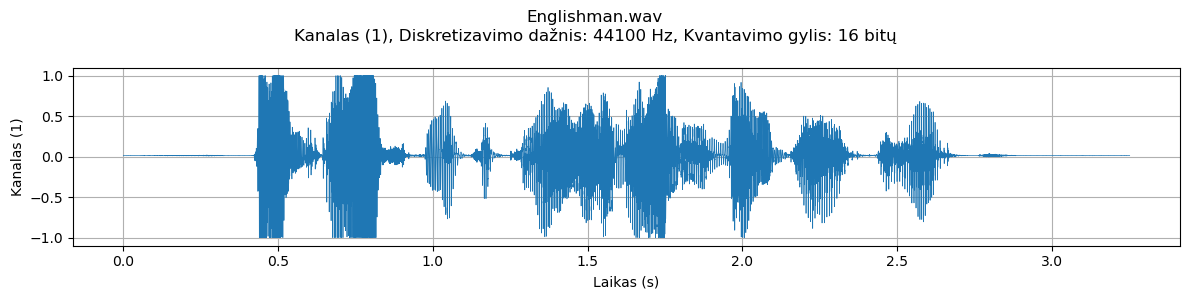

In [4]:
for ch in range(channels):
    time = channel_times[ch]
    fig, ax = plt.subplots(figsize=(12, 3))
    ax.plot(time, signal[:, ch], lw=0.5)
    ax.set_ylabel(f"Kanalas ({ch+1})")
    ax.set_xlabel("Laikas (s)")
    ax.grid(True)
    fig.suptitle(f"{os.path.basename(file_path)}\nKanalas ({ch+1}), "
                 f"Diskretizavimo dažnis: {samplerate} Hz, "
                 f"Kvantavimo gylis: {bit_depth} bitų")
    plt.tight_layout()
    plt.show()

### - Segmento pasirinkimas


--- Kanalas (1) ---


Įveskite atkarpos pradžią (s) nuo 0 iki 3.252 (s):  1
Įveskite atkarpos trukmę (s), siūloma įvesti 10-30 ms (0.01 - 0.03) trukmės atkarpas:  0.02


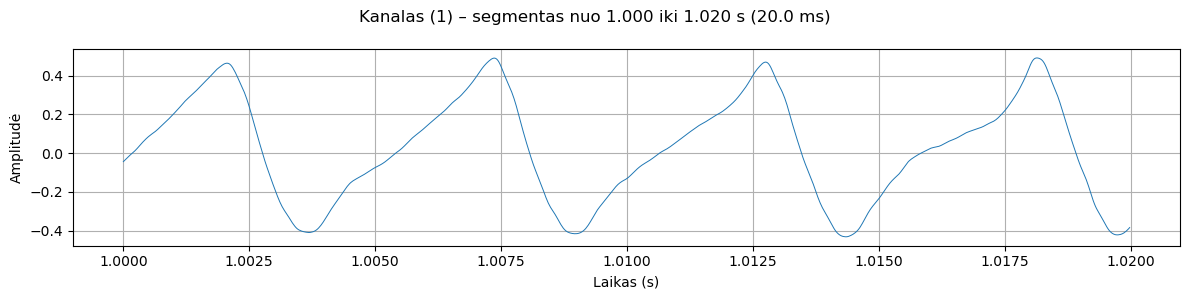

In [5]:
print(f"\n--- Kanalas ({ch+1}) ---")
while True:
    start_t = float(input(f"Įveskite atkarpos pradžią (s) nuo 0 iki {time[-1]:.3f} (s): "))
    if 0 <= start_t < time[-1]:
        break
    else:
        print(f"Klaida! Įveskite reikšmę nuo 0 iki {time[-1]:.3f} (s)")

while True:
    duration = float(input("Įveskite atkarpos trukmę (s), siūloma įvesti 10-30 ms (0.01 - 0.03) trukmės atkarpas: "))
    end_t = start_t + duration
    if 0 < duration <= time[-1] - start_t:
        break
    else:
        print(f"Klaida! Galima trukmė iki {time[-1] - start_t:.3f}s")

# Mėginių ribos
start_s = int(start_t * samplerate)
end_s = int(end_t * samplerate)
segment = signal[start_s:end_s, ch]
seg_time = np.arange(len(segment)) / samplerate + start_t

# Segmento laiko diagrama
fig, ax = plt.subplots(figsize=(12, 3))
ax.plot(seg_time, segment, lw=0.7)
ax.set_ylabel("Amplitudė")
ax.set_xlabel("Laikas (s)")
ax.grid(True)
fig.suptitle(f"Kanalas ({ch+1}) – segmentas nuo {start_t:.3f} iki {end_t:.3f} s ({duration*1000:.1f} ms)")
plt.tight_layout()
plt.show()

### - Apskaičiuojama ir pateikiama signalo atkarpos amplitudės spektro funkcija

Pasirinkite lango tipą:
1. Hanning
2. Hamming
3. Trikampis
4. Stačiakampis


Jūsų pasirinkimas (1–4):  3


C:\Users\alana\anaconda3\Lib\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
C:\Users\alana\anaconda3\Lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


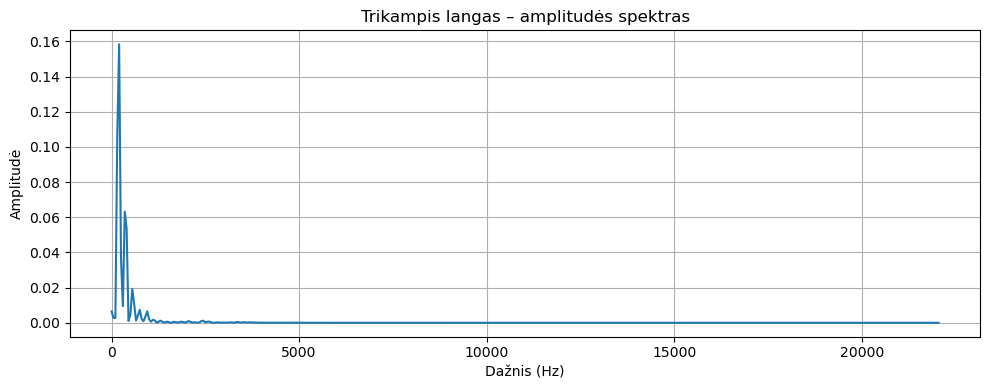

In [6]:
# 3.a) Lango funkcijos pasirinkimas

print("Pasirinkite lango tipą:")
print("1. Hanning\n2. Hamming\n3. Trikampis\n4. Stačiakampis")
while True:
    window_choice = int(input("Jūsų pasirinkimas (1–4): "))
    N = len(segment)
    if window_choice == 1:
        window = np.hanning(N)
        window_name = "Hanning"
        break
    elif window_choice == 2:
        window = np.hamming(N)
        window_name = "Hamming"
        break
    elif window_choice == 3:
        window = 1 - np.abs((np.arange(N) - (N-1)/2) / ((N+1)/2))
        window_name = "Trikampis"
        break
    elif window_choice == 4:
        window = np.ones(N)
        window_name = "Stačiakampis"
        break
    else:
        print("Pasirinkite reikšmę nuo 1 iki 4.")


# 3.b) Furjė transformacija
windowed_segment = segment * window
spectrum = np.fft.fft(windowed_segment)
N = len(spectrum)

# 3.c) Apkarpymas pagal N
if N % 2 == 0:
    spectrum = spectrum[:N//2 + 1]
    # 3.d) Pritaikomas mastelio koeficientas
    scale = np.ones_like(spectrum)
    scale[1:-1] *= 2
else:
    spectrum = spectrum[:(N+1)//2]
    # 3.d) Pritaikomas mastelio koeficientas
    scale = np.ones_like(spectrum)
    scale[1:] *= 2

# 3.b) Apskaičiuojamas kompleksinės sekos modulis ir normalizacija
spectrum = np.abs(spectrum) / N * scale

# 3.e) Sugeneruojamos dažnio f reikšmės [0 ... Fs/2], kur Fs – signalo diskretizavimo dažnis.
freqs = np.linspace(0, samplerate / 2, len(spectrum))

# 3.f) Pateikiama trumpalaikio signalo spektro diagrama.
fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(freqs, spectrum)
ax.set_title(f"{window_name} langas – amplitudės spektras")
ax.set_xlabel("Dažnis (Hz)")
ax.set_ylabel("Amplitudė")
ax.grid(True)
plt.tight_layout()
plt.show()

### - Spektro analizės reikšmės

In [7]:
print("\n--- Spektro analizė ---")
dominant_freq = freqs[np.argmax(spectrum)]
print(f"Vyraujantis dažnis: {dominant_freq:.1f} Hz")
print(f"Maksimali spektro reikšmė: {np.max(spectrum):.5f}\n")

# 3) Periodas pagal dažnį (T = 1/f)
if dominant_freq > 0:
    period = 1 / dominant_freq
    print(f"Dažnio periodas: {period*1000:.3f} ms")
else:
    print("Periodas neskaičiuojamas (vyraujantis dažnis = 0 Hz).")

# 4) Maksimalus stebimas dažnis (Nyquist)
nyquist = samplerate / 2
print(f"Maksimalus stebimas dažnis (Nyquist): {nyquist:.1f} Hz")

# 5) Pasikartojamumo (periodiškumo) įvertinimas – autokoreliacija
autocorr = np.correlate(segment, segment, mode='full')
autocorr = autocorr[len(autocorr)//2:]  # Naudojama tik teigiama dalis

# randame pirmą maksimumą (po nulio) – periodiškumo rodiklis
peak_index = np.argmax(autocorr[1:]) + 1
peak_time = peak_index / samplerate

print(f"Autokoreliacijos pagrindinis maksimumas ties: {peak_time*1000:.3f} ms")


--- Spektro analizė ---
Vyraujantis dažnis: 200.0 Hz
Maksimali spektro reikšmė: 0.15839+0.00000j

Dažnio periodas: 5.000 ms
Maksimalus stebimas dažnis (Nyquist): 22050.0 Hz
Autokoreliacijos pagrindinis maksimumas ties: 0.023 ms
